## Goal: Create a regression model for predicting the prices (column 'Final Price').

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
# Laptops price dataset from Kaggle.
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')

In [ ]:
#OR
# PATH = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
# select_cols = ['ram', 'storage', 'screen', 'final_price']
# df = pd.read_csv(PATH, usecols=select_cols)

In [5]:
print(df.shape)

(2160, 12)


In [6]:
df.head(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.00
6,Lenovo Thinkpad E14 Gen 4 AMD Ryzen 5 5625U/8G...,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,NaN,14.0,No,909.00
7,ASUS VivoBook 15 F515JA-EJ2882W Intel Core i7-...,New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No,809.01
8,Medion Akoya E15415 Intel Core i5-10210U/8GB/2...,New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No,519.00
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00


## Preparing the dataset

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
df.head(3)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.0


In [11]:
df_col = df[['ram', 'storage', 'screen', 'final_price']]

In [12]:
df_col

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


# Exploratory Data Analysis

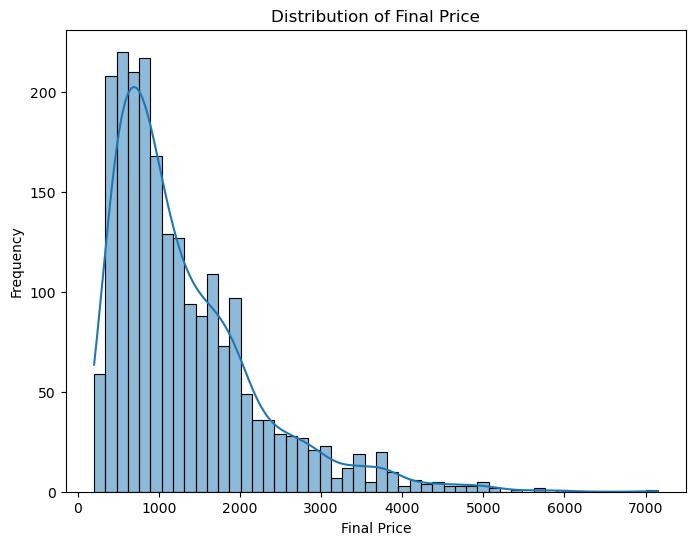

In [13]:

# EDA - does the final_price variable have a long tail?

# Plotting a histogram to check
plt.figure(figsize=(8, 6))
sns.histplot(df_col['final_price'], bins=50, kde=True)
plt.title('Distribution of Final Price')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

In [14]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


In [15]:
# Q1 = 
df_col.isnull().sum() #.any()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [16]:
# Initializing Descriptive Analysis
df.describe(percentiles = [.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
ram,2160.0,15.413889,9.867815,4.00,4.00,8.00,8.0000,16.000,16.00,32.000,32.0000,64.0000,128.00
storage,2160.0,596.294444,361.220506,0.00,0.00,256.00,256.0000,512.000,1000.00,1000.000,1000.0000,2000.0000,4000.00
screen,2156.0,15.168112,1.203329,10.10,10.10,13.40,14.0000,15.600,15.60,16.100,17.3000,17.3000,18.00
final_price,2160.0,1312.638509,911.475417,201.05,201.05,449.99,661.0825,1031.945,1708.97,2518.038,3199.0005,4499.4059,7150.47


In [17]:
#Q2:  median
mid_ram = df_col['ram'].median()
print(f"The median (50th percentile) of ram is: {mid_ram}")

The median (50th percentile) of ram is: 16.0


In [40]:
#OR  Median using numpy
np.median(df_col['ram'])

16.0

C:\Users\shbel\AppData\Local\Temp\ipykernel_4352\1599220043.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_col.hist(bins=280, ax=ax, layout=[2,2], column=['ram', 'storage', 'screen', 'final_price'])


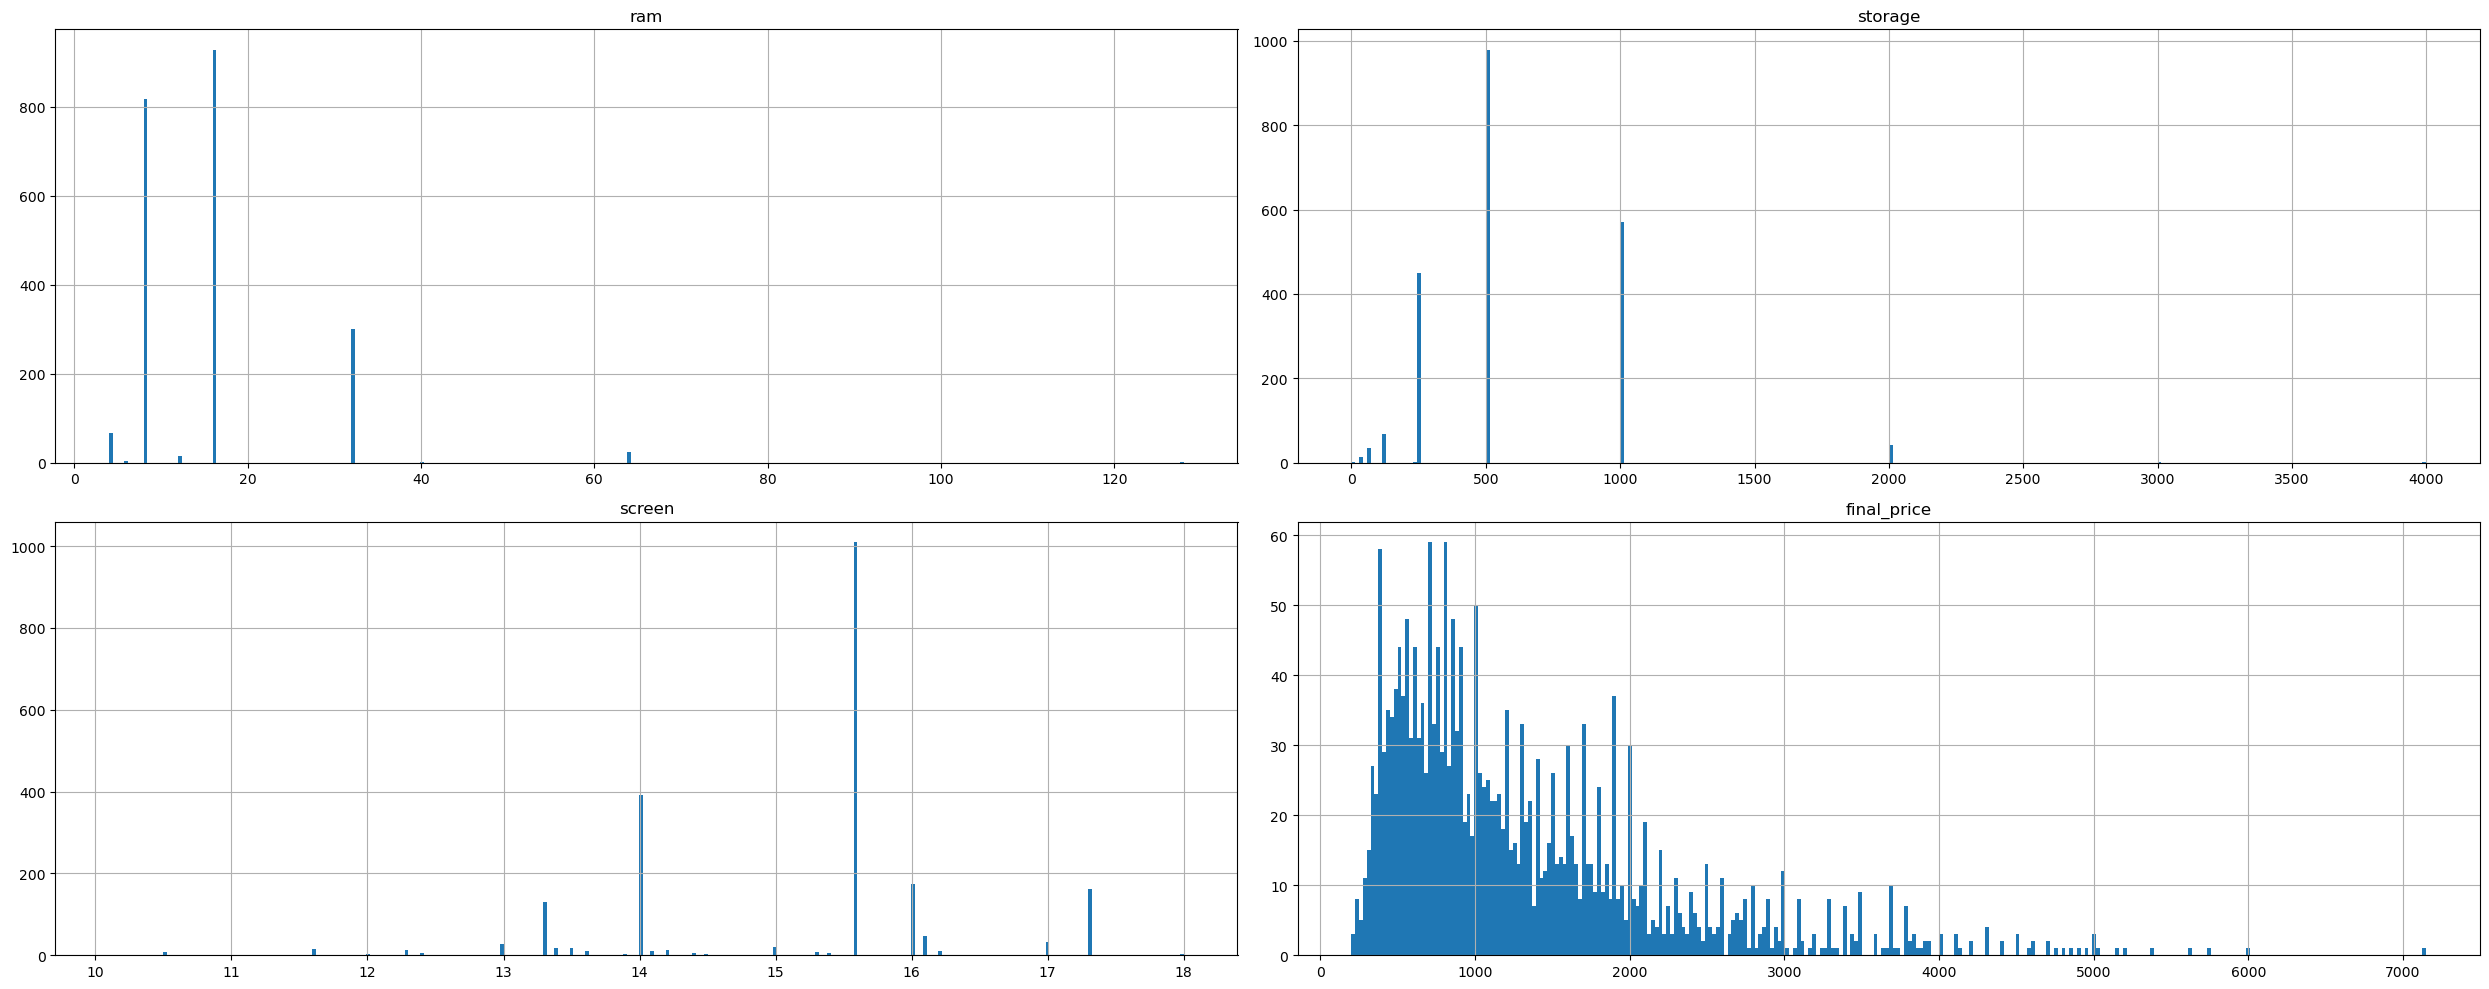

In [41]:
# Histogram
fig = plt.figure(figsize=(25,10))
ax = plt.gca()
df_col.hist(bins=280, ax=ax, layout=[2,2], column=['ram', 'storage', 'screen', 'final_price'])

plt.tight_layout()
plt.show()

C:\Users\shbel\AppData\Local\Temp\ipykernel_4352\553747611.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.final_price)


<Axes: xlabel='final_price', ylabel='Density'>

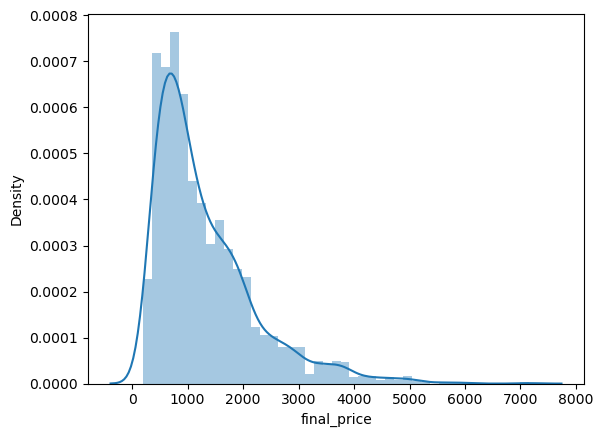

In [20]:
sns.distplot(df.final_price)

C:\Users\shbel\AppData\Local\Temp\ipykernel_4352\81856121.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df.final_price))


<Axes: xlabel='final_price', ylabel='Density'>

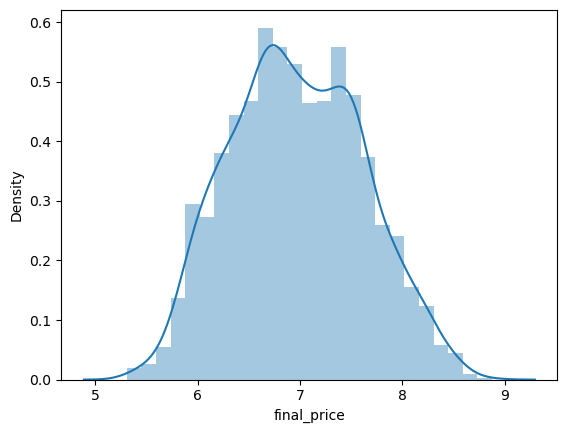

In [21]:
#Normalized mean value
sns.distplot(np.log1p(df.final_price))

# Simple Linear Regression

In [63]:
# Function For Linear Regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

# Dataset Preparation

In [56]:
# SPLIT THE DATA ONE
from sklearn.model_selection import train_test_split

# Shuffle the dataset using a fixed seed (42)
df_shuffled = df_col.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into 60% training and 40% remaining (for validation and test)
train_data, remaining_data = train_test_split(df_shuffled, test_size=0.4, random_state=42)

# Split the remaining data into 50% validation and 50% test (which is 20%/20% overall)
val_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

# Check the shapes to ensure correct splitting
print(f"Train set size: {train_data.shape}")
print(f"Validation set size: {val_data.shape}")
print(f"Test set size: {test_data.shape}")

Train set size: (1296, 4)
Validation set size: (432, 4)
Test set size: (432, 4)


In [57]:
# SPLIT THE DATA - ANOTHER TAKE:

n = len(df_col)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#SHUFFLING THE DATASET
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df_col.iloc[idx]

# PREPARING THE DATASET
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [58]:
# PREPARING THE LABELS
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)


In [59]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [68]:
# Question 3
 # Preparing the dataset for X

check = ['ram', 'storage', 'screen']

#Deal with missing values
# Zero
def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [88]:
# FUNCTION FOR RMSE VALUES:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [89]:
# FILLING MISSING VALUES
# Use the training dataset only
mean = df_train.screen.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

In [90]:
# FILLING MISSING VALUES:
X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [91]:
# GETTING RMSE SCORE
mean_rmse = np.round(rmse(y_val, y_mean_pred_val), 2)
print(f'Mean RMSE is {mean_rmse}')


Mean RMSE is 0.43


In [92]:
# PREPING DATASET
X_null_train = prepare_X(df_train,fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

In [93]:
# PREPING DATASET
X_null_val = prepare_X(df_val,fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [94]:
# RMSE score
zero_rmse = np.round(rmse(y_val, y_null_pred_val), 2)
print(f'Zero RMSE is {zero_rmse}')


Zero RMSE is 0.43


##### Question 4
> Regularization

In [104]:
# Train a regularized Linear Regression.
#Fill NA with 0

#FUNCTION FOR TRAINING LINEAR REGRESSION:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0]) #regularization
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [105]:
#INSPECTING THE RESULTS:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

0 6.722879421950521 0.41
0.01 6.714631208859114 0.41
0.1 6.64130189169294 0.41
1 5.987729690346249 0.42
5 4.168960069201381 0.49
10 3.0255569232237765 0.57
100 0.5303563684530654 0.77


##### Question 5 - Seed Checking

In [106]:
# CHECKING THE RMSE SCORES:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df_col.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.final_price.values
    y_val_orig = df_val.final_price.values
    y_test_orig = df_test.final_price.values

    y_train = y_train_orig
    y_val = y_val_orig
    y_test = y_test_orig
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 547.5696230184624 565.45
1 594.4197427998372 636.8
2 649.4685454768363 588.96
3 571.9459040111583 597.81
4 629.3882030644238 571.96
5 580.7647373329446 573.24
6 783.7683689904087 647.34
7 376.43586006224785 550.44
8 572.8852361196888 587.33
9 663.379279260705 576.1


In [107]:
# INSPECTING THE RMSE LIST:
rmse_list

[565.45, 636.8, 588.96, 597.81, 571.96, 573.24, 647.34, 550.44, 587.33, 576.1]

In [108]:
#INSPECTING THE RMSE:
np.round(np.std(rmse_list),3)

29.176

##### SEED AND REGULRIZATION

In [113]:
# INITIALIZING SEED AND REGULARIZATION:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df_col.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.final_price.values
y_test_orig = df_test.final_price.values

y_train_val = y_train_val_orig
y_test = y_test_orig

del df_train_val['final_price']
del df_test['final_price']

In [114]:
#INSPECTING RMSE:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

608.61